In [23]:
import datetime as dt
import pandas as pd
from arch import arch_model
import numpy as np

data = pd.read_csv("../raw_data/MSFT 1986-2021.csv",parse_dates = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061608,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063809,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064909,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063258,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062158,47894400
...,...,...,...,...,...,...,...
8878,2021-06-03,245.220001,246.339996,243.000000,245.710007,245.710007,25307700
8879,2021-06-04,247.759995,251.649994,247.509995,250.789993,250.789993,25275000
8880,2021-06-07,249.979996,254.089996,249.809998,253.809998,253.809998,23079200
8881,2021-06-08,255.160004,256.010010,252.509995,252.570007,252.570007,22455000


In [25]:
data['Date'] = pd.to_datetime(data['Date'])

In [26]:
#dataAG= data[(data.symbol=="MSFT")]

#dataAG= dataAG[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#dataAG= dataAG[(dataAG.date.dt.year > 2013 ) & (dataAG.date.dt.year < 2021)]

#dataAG.sort_values(by=["date"], inplace=True)
#dataAG

In [28]:
data.shape

(8883, 7)

In [33]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)
plt.rc

<function matplotlib.pyplot.rc(group, **kwargs)>

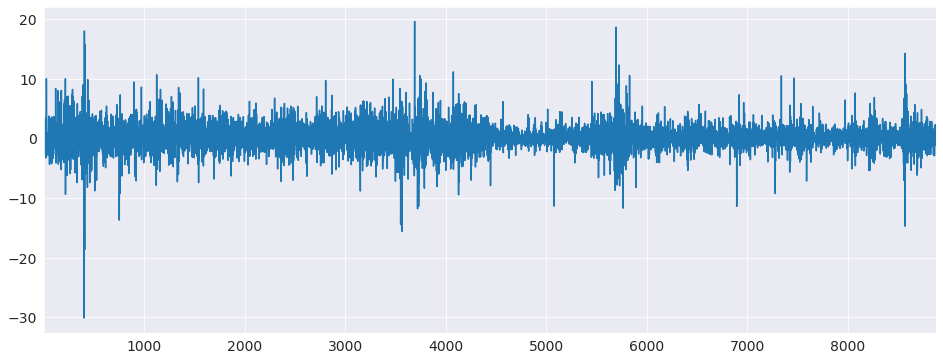

In [37]:
st = dt.datetime(1986, 3, 13)
en = dt.datetime(2021, 6, 9)
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [31]:
am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 18201.78371310944
Iteration:     10,   Func. Count:     64,   Neg. LLF: 18189.963545323608
Optimization terminated successfully    (Exit mode 0)
            Current function value: 18189.963307564165
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -18190.0
Distribution:                  Normal   AIC:                           36387.9
Method:            Maximum Likelihood   BIC:                           36416.3
                                        No. Observations:                 8882
Date:                Thu, Jun 10 2021   Df Residuals:                     8881
Time:        

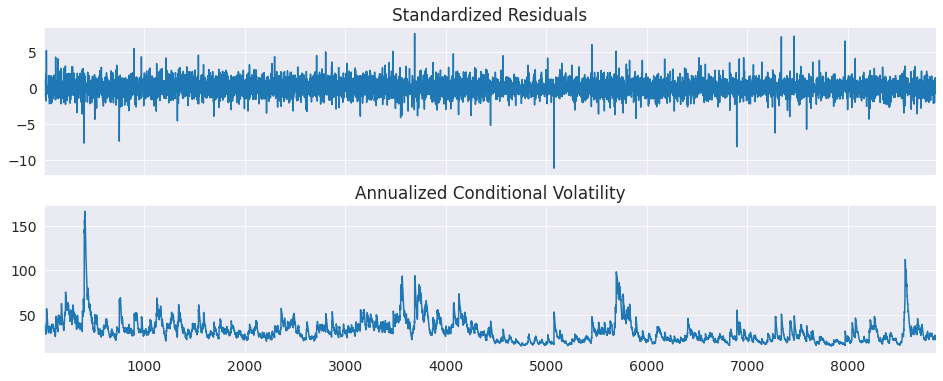

In [32]:
fig = res.plot(annualize="D")

In [40]:
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -18170.4
Distribution:                  Normal   AIC:                           36350.7
Method:            Maximum Likelihood   BIC:                           36386.2
                                        No. Observations:                 8882
Date:                Thu, Jun 10 2021   Df Residuals:                     8881
Time:                        16:25:43   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0990  1.730e-02      5.721  1.059e-08 [6.506e-0

In [42]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     46,   Neg. LLF: 18602.050673572456
Iteration:     10,   Func. Count:     85,   Neg. LLF: 17682.933244460146
Iteration:     15,   Func. Count:    125,   Neg. LLF: 20049.643294310103
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17680.849436983364
            Iterations: 20
            Function evaluations: 164
            Gradient evaluations: 18
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -17680.8
Distribution:      Standardized Student's t   AIC:                           35373.7
Method:                  Maximum Likelihood   BIC:                           35416.2
                                              No. Observatio